## SNP Explorer

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import clear_output, display

In [2]:
data = pd.read_csv('my_genome.txt', sep='\t', dtype={'rsid':'str', 'chromosome':'object', 'position':'int', 'genotype':'str'}, comment='#')

In [3]:
data.head()

,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs13328684,1,74792,--
2,rs9283150,1,565508,AA
3,i713426,1,726912,AA
4,rs116587930,1,727841,GG


In [4]:
print ('You have ' + str(len(data)) + ' SNPs')

You have 638544 SNPs


In [5]:
data.isnull().sum()

rsid          0
chromosome    0
position      0
genotype      0
dtype: int64

In [6]:
data.nunique()

rsid          638544
chromosome        25
position      634974
genotype          20
dtype: int64

In [7]:
data.chromosome.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X',
       'Y', 'MT'], dtype=object)

<b> Reformat all chromosomes to numbers.  Will be different based on sex.</b>

In [8]:
keys = list(range(1,26))
chromosome_dict = dict(zip(keys, data.chromosome.unique()))

In [9]:
#substitute numbers for X,Y, and MT
data['chromosome'] = data['chromosome'].apply(lambda x: re.sub(r'X', r'23', x))
data['chromosome'] = data['chromosome'].apply(lambda x: re.sub(r'Y', r'24', x))
data['chromosome'] = data['chromosome'].apply(lambda x: re.sub(r'MT', r'25', x))

data['chromosome'] = data['chromosome'].apply(lambda x: int(x))

<b> SNPs per chromosome with visual </b>

In [10]:
x = []
y = []
for k in chromosome_dict:
    x.append(k)
    y.append(len(data[data.chromosome == k]))
rsid_per_chromosome = dict(zip(x,y))

rsid_per_chromosome

{1: 49516,
 2: 51779,
 3: 43025,
 4: 39474,
 5: 37035,
 6: 44028,
 7: 34358,
 8: 31686,
 9: 26447,
 10: 30528,
 11: 30944,
 12: 29434,
 13: 22076,
 14: 19962,
 15: 19007,
 16: 20401,
 17: 19400,
 18: 17675,
 19: 14924,
 20: 14785,
 21: 8607,
 22: 8915,
 23: 16531,
 24: 3733,
 25: 4274}

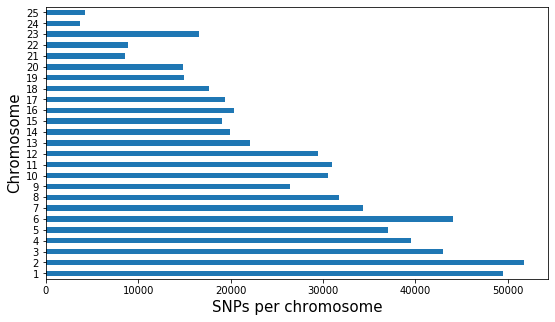

In [11]:
rsid_per_chromosome_series = data.groupby('chromosome')['rsid'].count()
rsid_per_chromosome_series.columns = ['chromosome', 'count']

rsid_per_chromosome_series.plot.barh(figsize=(9,5), fontsize=10)
plt.xlabel("SNPs per chromosome", fontsize=15)
plt.ylabel("Chromosome", fontsize=15)
plt
plt.savefig('number of snps per chromosome.png')
plt.show()

In [12]:
gwas = pd.read_csv("gwas_catalog.tsv", sep='\t')
print ('There are ' + str(len(gwas)) + ' studies on ' + str(len(gwas['SNPS'].unique())) +
       ' different snps spanning ' + str(len(gwas['DISEASE/TRAIT'].unique())) +
       ' diseases and traits in the gwas catalog')

/Users/wahabkazi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,23,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are 179364 studies on 113510 different snps spanning 4314 diseases and traits in the gwas catalog


In [13]:
gwas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179364 entries, 0 to 179363
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DATE ADDED TO CATALOG       179364 non-null  object 
 1   PUBMEDID                    179364 non-null  int64  
 2   FIRST AUTHOR                179364 non-null  object 
 3   DATE                        179364 non-null  object 
 4   JOURNAL                     179364 non-null  object 
 5   LINK                        179364 non-null  object 
 6   STUDY                       179364 non-null  object 
 7   DISEASE/TRAIT               179364 non-null  object 
 8   INITIAL SAMPLE SIZE         179364 non-null  object 
 9   REPLICATION SAMPLE SIZE     45907 non-null   object 
 10  REGION                      172588 non-null  object 
 11  CHR_ID                      172588 non-null  object 
 12  CHR_POS                     172588 non-null  object 
 13  REPORTED GENE(

In [14]:
#pd.set_option('display.max_columns', None)
#gwas.head(50)

**Search GWAS catalog for all studies related to a specific trait**

In [16]:
#function to search for all studies related to a specific trait
def trait_study_search(trait):
    print ('There are ' + str(len(gwas[gwas['DISEASE/TRAIT']==trait])) + ' results')
    return gwas[gwas['DISEASE/TRAIT']==trait]

In [17]:
trait_study_text = widgets.Text(
    value='Type disease/trait here',
    placeholder='Type something',
    description='trait',
    disabled=False
)
display(trait_study_text)

Text(value='Type disease/trait here', description='trait', placeholder='Type something')

In [19]:
trait_study_search(trait_study_text.value)

There are 2057 results


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
251,2010-03-25,20185149,Athanasiu L,2010-02-23,J Psychiatr Res,www.ncbi.nlm.nih.gov/pubmed/20185149,Gene variants associated with schizophrenia in...,Schizophrenia,"201 European ancestry cases, 305 European ance...","2,663 European ancestry cases, 13,780 European...",...,5.522879,NaN,1.130000,[NR],Affymetrix [572888],N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST000607,Genome-wide genotyping array
252,2010-03-25,20185149,Athanasiu L,2010-02-23,J Psychiatr Res,www.ncbi.nlm.nih.gov/pubmed/20185149,Gene variants associated with schizophrenia in...,Schizophrenia,"201 European ancestry cases, 305 European ance...","2,663 European ancestry cases, 13,780 European...",...,5.698970,NaN,1.160000,[NR],Affymetrix [572888],N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST000607,Genome-wide genotyping array
253,2010-03-25,20185149,Athanasiu L,2010-02-23,J Psychiatr Res,www.ncbi.nlm.nih.gov/pubmed/20185149,Gene variants associated with schizophrenia in...,Schizophrenia,"201 European ancestry cases, 305 European ance...","2,663 European ancestry cases, 13,780 European...",...,5.096910,NaN,1.160000,[NR],Affymetrix [572888],N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST000607,Genome-wide genotyping array
763,2008-08-11,18677311,O'Donovan MC,2008-07-30,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18677311,Identification of loci associated with schizop...,Schizophrenia,"479 European ancestry cases, 2,937 European an...","4,143 European ancestry cases, 6,515 European ...",...,5.221849,NaN,1.120000,[NR],Affymetrix [362532],N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST000215,Genome-wide genotyping array
764,2008-08-11,18677311,O'Donovan MC,2008-07-30,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18677311,Identification of loci associated with schizop...,Schizophrenia,"479 European ancestry cases, 2,937 European an...","4,143 European ancestry cases, 6,515 European ...",...,5.522879,NaN,1.160000,[NR],Affymetrix [362532],N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST000215,Genome-wide genotyping array
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168931,2019-02-21,30285260,Ikeda M,2018-10-03,Schizophr Bull,www.ncbi.nlm.nih.gov/pubmed/30285260,Genome-Wide Association Study Detected Novel S...,Schizophrenia,"14,023 East Asian ancestry cases, 33,640 Europ...",NaN,...,7.698970,NaN,1.055000,[1.04-1.07],Illumina [6627481] (imputed),N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST007201,Genome-wide genotyping array
168932,2019-02-21,30285260,Ikeda M,2018-10-03,Schizophr Bull,www.ncbi.nlm.nih.gov/pubmed/30285260,Genome-Wide Association Study Detected Novel S...,Schizophrenia,"14,023 East Asian ancestry cases, 33,640 Europ...",NaN,...,5.397940,(East Asian),1.246883,[1.09-1.4],Illumina [6627481] (imputed),N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST007201,Genome-wide genotyping array
168933,2019-02-21,30285260,Ikeda M,2018-10-03,Schizophr Bull,www.ncbi.nlm.nih.gov/pubmed/30285260,Genome-Wide Association Study Detected Novel S...,Schizophrenia,"14,023 East Asian ancestry cases, 33,640 Europ...",NaN,...,5.301030,(East Asian),1.123000,[1.07-1.18],Illumina [6627481] (imputed),N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST007201,Genome-wide genotyping array
168934,2019-02-21,30285260,Ikeda M,2018-10-03,Schizophr Bull,www.ncbi.nlm.nih.gov/pubmed/30285260,Genome-Wide Association Study Detected Novel S...,Schizophrenia,"14,023 East Asian ancestry cases, 33,640 Europ...",NaN,...,12.000000,(East Asian),1.137657,[1.1-1.17],Illumina [6627481] (imputed),N,schizophrenia,http://www.ebi.ac.uk/efo/EFO_0000692,GCST007201,Genome-wide genotyping array


<h2>Insights from merged raw data with all snps found in GWAS catalog</h2>

In [20]:
gwas_match = gwas[['SNPS','DISEASE/TRAIT', 'REPORTED GENE(S)','MAPPED_GENE',
                   'STRONGEST SNP-RISK ALLELE',"OR or BETA", 'STUDY','LINK']]

In [21]:
gwas_match = gwas_match.rename(columns={"SNPS": "rsid"})

In [22]:
#merging raw data with gwas catalog
import sys
np.set_printoptions(threshold=sys.maxsize)
df = data.merge(gwas_match, how='inner')
print ('You have ' + str(len(df['rsid'].unique())) + ' snps matched to ' + 
       str(len(df)) + ' studies across ' + str(len(df['DISEASE/TRAIT'].unique())) + ' traits')
trait_button = widgets.Button(description='See all traits')
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
          clear_output()
          print(df['DISEASE/TRAIT'].unique())
# linking button and function together using a button's method
trait_button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([trait_button,out])

You have 17164 snps matched to 42665 studies across 2971 traits


In [69]:
#pd.options.display.max_colwidth = 350
#df.head()

**Specific disease/trait search**

In [23]:
#function for finding what snps are associated with a specific trait in the raw data
def trait_snp_search(trait):
    trait_search = df.loc[df['DISEASE/TRAIT']== trait]
    print ('You have ' + str(len(trait_search['rsid'].unique())) + ' snps matched to ' + str(len(trait_search)) + 
       ' studies for ' + str(trait))
    return trait_search

In [24]:
trait_snp_search_text = widgets.Text(
    value='Type disease/trait here',
    placeholder='Type something',
    description='trait',
    disabled=False
)
display(trait_snp_search_text)

Text(value='Type disease/trait here', description='trait', placeholder='Type something')

In [25]:
#run this cell to see the snps associated to studies for the trait entered above
pd.set_option('display.max_rows', None)
trait_snp_search(trait_snp_search_text.value)

You have 0 snps matched to 0 studies for Type disease/trait here


,rsid,chromosome,position,genotype,DISEASE/TRAIT,REPORTED GENE(S),MAPPED_GENE,STRONGEST SNP-RISK ALLELE,OR or BETA,STUDY,LINK


<b> Specific SNP search from merged raw data </b>

In [26]:
#Function to find all studies associated with a specific snp
def snp_search(rsid):
    rsid_search = df.loc[df['rsid'] == rsid]
    print ('There are ' + str(len(rsid_search)) + ' studies associated with this snp')
    return rsid_search

In [27]:
merged_snp_text = widgets.Text(
    value='Type snp rsid here',
    placeholder='Type something',
    description='snp',
    disabled=False
)
display(merged_snp_text)

Text(value='Type snp rsid here', description='snp', placeholder='Type something')

In [28]:
snp_search(merged_snp_text.value)

There are 0 studies associated with this snp


,rsid,chromosome,position,genotype,DISEASE/TRAIT,REPORTED GENE(S),MAPPED_GENE,STRONGEST SNP-RISK ALLELE,OR or BETA,STUDY,LINK


<b> Visualizing greatest number of SNPs by condition </b>

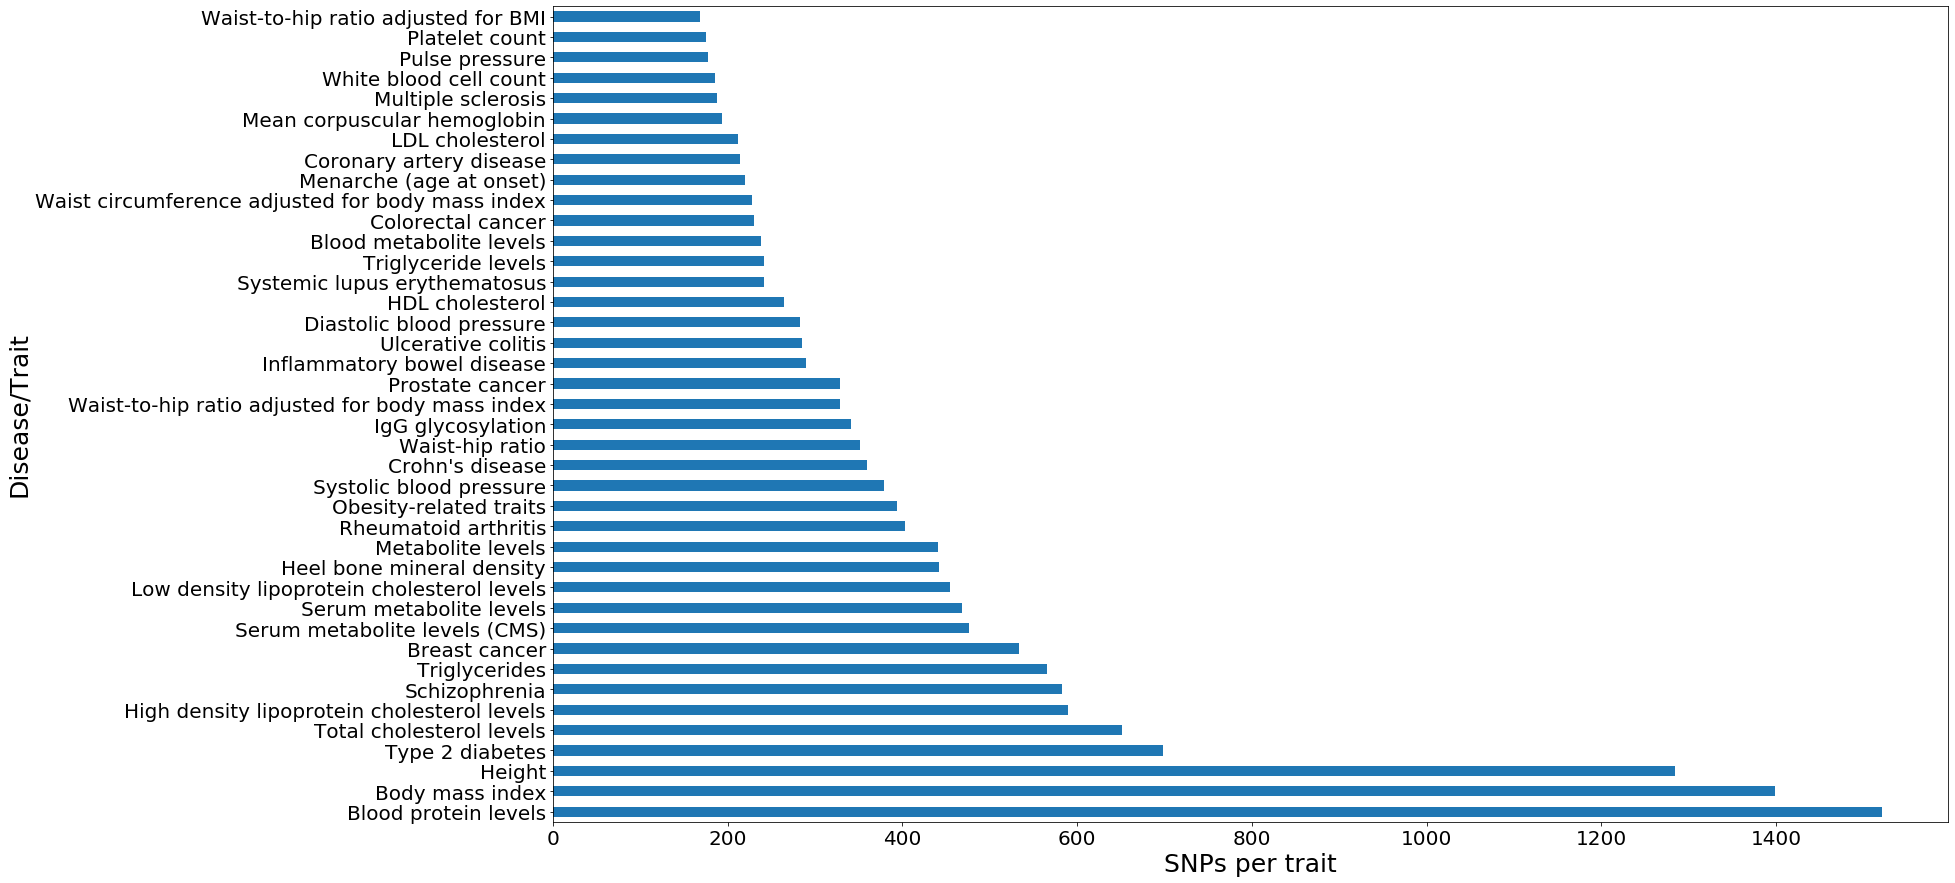

In [39]:
snps_per_trait = df.groupby('DISEASE/TRAIT')['rsid'].count()
snps_per_trait.columns = ['DISEASE/TRAIT', 'count']
snps_per_trait = snps_per_trait.sort_values(ascending=False)
snps_per_trait = snps_per_trait.head(40)
snps_per_trait.plot.barh(figsize=(25,15), fontsize=20)
plt.xlabel("SNPs per trait", fontsize=25)
plt.ylabel("Disease/Trait", fontsize=25)
plt.savefig('snps per trait.png')
plt.show()

<b> Trait SNPs sorted by odds ratio </b>

In [38]:
#sort by odds ratio
odds = df.sort_values('OR or BETA', ascending=False)

In [36]:
#function that orders the highest odds ratio snps by a specific trait
def trait_odds_search(trait):
    trait_odds = odds.loc[odds['DISEASE/TRAIT'] == trait]
    return trait_odds

In [34]:
trait_text = widgets.Text(
    value='Type disease/trait here',
    placeholder='Type something',
    description='disease/trait',
    disabled=False
)
display(trait_text)

Text(value='Type disease/trait here', description='disease/trait', placeholder='Type something')

In [40]:
trait_odds_search(trait_text.value)

,rsid,chromosome,position,genotype,DISEASE/TRAIT,REPORTED GENE(S),MAPPED_GENE,STRONGEST SNP-RISK ALLELE,OR or BETA,STUDY,LINK
28280,rs76569837,12,45959763,GG,Schizophrenia,intergenic,AC079950.1,rs76569837-G,2.700000,Genome-wide association study of schizophrenia in Ashkenazi Jews.,www.ncbi.nlm.nih.gov/pubmed/26198764
3394,rs7527939,1,210536025,CC,Schizophrenia,HHAT,"HHAT, HHAT",rs7527939-C,2.630000,Whole-genome-wide association study in the Bulgarian population reveals HHAT as schizophrenia susceptibility gene.,www.ncbi.nlm.nih.gov/pubmed/23142968
37816,rs1261117,18,52949657,CC,Schizophrenia,TCF4,TCF4,rs1261117-T,1.600000,A comprehensive family-based replication study of schizophrenia genes.,www.ncbi.nlm.nih.gov/pubmed/23894747
23342,rs3847375,10,21567565,AC,Schizophrenia,intergenic,LUZP4P1 - RNU6-15P,rs3847375-?,1.460000,Genome-wide association study of multiplex schizophrenia pedigrees.,www.ncbi.nlm.nih.gov/pubmed/22885689
37818,rs17594526,18,53058238,CC,Schizophrenia,TCF4,TCF4,rs17594526-T,1.440000,Common polygenic variation contributes to risk of schizophrenia and bipolar disorder.,www.ncbi.nlm.nih.gov/pubmed/19571811
37655,rs2048485,18,42090667,CT,Schizophrenia,intergenic,LINC01478,rs2048485-?,1.400000,Genome-wide association study of multiplex schizophrenia pedigrees.,www.ncbi.nlm.nih.gov/pubmed/22885689
37812,rs12966547,18,52752017,AG,Schizophrenia,CCDC68,CCDC68 - LINC01929,rs12966547-G,1.400000,Genome-wide association study identifies five new schizophrenia loci.,www.ncbi.nlm.nih.gov/pubmed/21926974
28909,rs12426725,12,81843128,GG,Schizophrenia,PPFIA2,"AC069228.1, PPFIA2",rs12426725-?,1.370000,Genome-wide association study of multiplex schizophrenia pedigrees.,www.ncbi.nlm.nih.gov/pubmed/22885689
27798,rs4765905,12,2349584,GG,Schizophrenia,TCF4,"CACNA1C, CACNA1C",rs17597926-?,1.360000,Genome-wide association study in a Swedish population yields support for greater CNV and MHC involvement in schizophrenia compared with bipolar disorder.,www.ncbi.nlm.nih.gov/pubmed/22688191
35022,rs8057927,16,82692812,TT,Schizophrenia,CDH13,CDH13,rs8057927-C,1.342000,Genome-wide study of association and interaction with maternal cytomegalovirus infection suggests new schizophrenia loci.,www.ncbi.nlm.nih.gov/pubmed/23358160


<b> Graph of highest odds ratio SNPs for a specific trait </b>

In [43]:
#function to graph the highest odds ratio snps for a specific trait
def trait_snp_odds_graph(trait):
    trait_snp_odds = odds.loc[odds['DISEASE/TRAIT'] == trait]
    odds_per_snp = trait_snp_odds[['rsid','OR or BETA']]
    odds_per_snp = odds_per_snp.head(40)
    plt.figure(figsize=(7, 7))
    return sns.barplot(x='OR or BETA', y='rsid',data=odds_per_snp).set_title(str(trait))
    plt.savefig('highest odds ratio snps for a specific trait')

In [41]:
graph_trait_text = widgets.Text(
    value='Type disease/trait here',
    placeholder='Type something',
    description='disease/trait',
    disabled=False
)
display(graph_trait_text)

Text(value='Type disease/trait here', description='disease/trait', placeholder='Type something')

Text(0.5, 1.0, 'Schizophrenia')

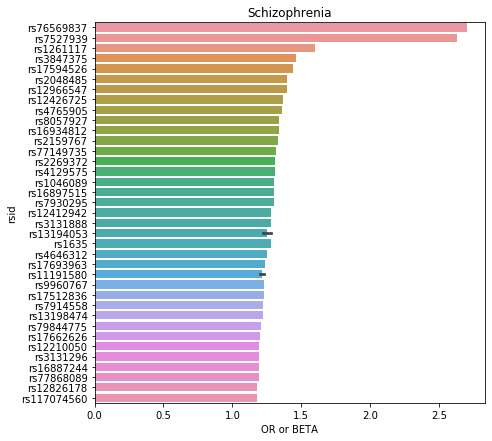

In [44]:
trait_snp_odds_graph(graph_trait_text.value)

<b> List of SNPs sorted by highest odds ratio </b>

In [62]:
from IPython.display import display
odds_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=200,
    step=10,
    description='Value:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
print('Choose odds ratio minimum threshold')
display(odds_slider)
results_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=200,
    step=10,
    description='# of results',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
print('Choose maximum number of results to display')
display(results_slider)

Choose odds ratio minimum threshold


IntSlider(value=0, continuous_update=False, description='Value:', max=200, step=10)

Choose maximum number of results to display


IntSlider(value=0, continuous_update=False, description='# of results', max=200, step=10)

In [65]:
#run this cell to see results
custom_odds = odds[odds['OR or BETA'] > odds_slider.value]
print('There are ' + str(len(custom_odds)) + ' total results')
custom_odds.head(results_slider.value)

There are 79 total results


,rsid,chromosome,position,genotype,DISEASE/TRAIT,REPORTED GENE(S),MAPPED_GENE,STRONGEST SNP-RISK ALLELE,OR or BETA,STUDY,LINK
25497,rs11570112,11,47355475,GG,Cerebrospinal fluid sTREM-2 levels,NR,MYBPC3,rs11570112-?,15745.0910,Genome-Wide Association Studies for Cerebrospinal Fluid Soluble TREM2 in Alzheimer's Disease.,www.ncbi.nlm.nih.gov/pubmed/31708768
36755,rs8072451,17,43893716,CC,Subcortical brain region volumes,"MAPT, GRN, CRHR1, STH","CRHR1, MAPT-AS1, MAPT-AS1, MAPT-AS1, LINC02210-CRHR1, LINC02210-CRHR1",rs8072451-?,14489.9900,Common genetic variants influence human subcortical brain structures.,www.ncbi.nlm.nih.gov/pubmed/25607358
36756,rs17689882,17,43906828,GG,Subcortical brain region volumes,CRHR1,"LINC02210-CRHR1, LINC02210-CRHR1, MAPT-AS1, MAPT-AS1, MAPT-AS1, CRHR1",rs17689882-A,13460.4700,Common genetic variants influence human subcortical brain structures.,www.ncbi.nlm.nih.gov/pubmed/25607358
16714,rs4273712,6,126964510,AA,Subcortical brain region volumes,"RNF146, CENPW, RSPO3",AL356534.1,rs4273712-?,9460.7600,Common genetic variants influence human subcortical brain structures.,www.ncbi.nlm.nih.gov/pubmed/25607358
28785,rs10784502,12,66343810,TT,Brain structure,HMGA2,HMGA2,rs10784502-C,9006.7100,Identification of common variants associated with human hippocampal and intracranial volumes.,www.ncbi.nlm.nih.gov/pubmed/22504417
40649,rs117019330,20,8831588,GG,Cerebrospinal fluid sTREM-2 levels,NR,PLCB1,rs117019330-?,7814.9805,Genome-Wide Association Studies for Cerebrospinal Fluid Soluble TREM2 in Alzheimer's Disease.,www.ncbi.nlm.nih.gov/pubmed/31708768
7158,rs192422946,2,214275248,CC,Cerebrospinal fluid sTREM-2 levels,NR,SPAG16,rs192422946-?,7359.0737,Genome-Wide Association Studies for Cerebrospinal Fluid Soluble TREM2 in Alzheimer's Disease.,www.ncbi.nlm.nih.gov/pubmed/31708768
7457,rs1190460,2,233366740,AA,Antipsychotic drug-induced QTc interval change in schizophrenia,NR,ECEL1 - PRSS56,rs1190460-C,6260.0000,A molecular pathway analysis informs the genetic risk for arrhythmias during antipsychotic treatment.,www.ncbi.nlm.nih.gov/pubmed/29064910
30165,rs2721051,13,41110884,CC,Central corneal thickness,FOXO1,FOXO1,rs2721051-T,5836.0000,Multi-trait genome-wide association study identifies new loci associated with optic disc parameters.,www.ncbi.nlm.nih.gov/pubmed/31798171
1435,rs114182264,1,89777141,GG,Cerebrospinal fluid sTREM-2 levels,NR,AC099063.2 - BX119321.1,rs114182264-?,5225.0806,Genome-Wide Association Studies for Cerebrospinal Fluid Soluble TREM2 in Alzheimer's Disease.,www.ncbi.nlm.nih.gov/pubmed/31708768


<b> SNPs of interest for diet and supplementation </b>

In [46]:
#dataframe for actionable insights
pd.options.display.max_colwidth = 350
protocol = pd.read_csv('master.csv', engine='python', 
                       dtype={'rsid':'str', 'gene':'str', 'SNP ID':'str', 'alleles':'str', 'what it means':'str',
                              'recommendations for (+/+)':'str', 'recommendations for (+/-)':'str', 
                              'recommendations for (-/-)':'str', 'reference':'str'})
protocol.head(5)

,rsid,gene,SNP ID,alleles,what it means,recommendations for (+/+),recommendations for (+/-),recommendations for (-/-),reference,tests
0,rs234706,CBS,C699T,"T/T (+/+), C/T (-/+), C/C (-/-)",Higher conversion of homocysteine to cystathionine,Ensure adequate intake of vitamin B6. A supplement may be recommended.,Ensure adequate intake of vitamin B6. A supplement may be recommended.,No recommendations,methylation protocol,"Plasma B6: Adults: 2.1-21.7 ng/mL, Serum homocysteine: CBS activity is inversely associated with homocysteine levels. Men: <11.4 _mol/L, Women: <10.4 _mol/L"
1,rs4680,COMT,Val158Met,"Met/Met (+/+), Val/Met (-/+), Val/Val (-/-)",Reduced detoxification of catecholamines and estrogen.,"Manage stress with meditation, yoga or breathing exercises. Include vegetables such as broccoli, cauliflower, and Brussels sprouts in your diet to support. estrogen metabolism. Consider supplement options for hormonal balance and, if applicable, for sleep and relaxation support.","Manage stress with meditation, yoga or breathing exercises. Include vegetables such as broccoli, cauliflower, and Brussels sprouts in your diet to support. estrogen metabolism. Consider supplement options for hormonal balance and, if applicable, for sleep and relaxation support.",No recommendations,methylation protocol,"Urinary estrogen metabolite ratio (2-OH(E1+E2) / 16_-OHE1): Indicates how effectively a patient methylates estrogens (2-hydroxyestrone to 2-methoxyestrone). Premenopausal, luteal phase women: 0.3-13.7, Postmenopausal women: 0.3-15.1, Men: 0.8-12.9"
2,rs602662,FUT2,G772A,"A/A (+/+), G/A (-/+), G/G (-/-)",Modified risk of low B12 status; potential for lower intestinal microbial diversity.,"Include yogurt, kefir and fermented foods in your diet.",You may need a vitamin B12 supplement.,You may need a vitamin B12 supplement.,methylation protocol,Serum B12(for -/- only): Adults: 180-914 ng/L
3,rs1801133,MTHFR,C677T,"T/T (+/+), C/T (-/+), C/C (-/-)",Reduced ability to activate folates to 5-MTHF,"Eat plenty of green, leafy vegetables, which provide folate in a form the body can use.","Eat plenty of green, leafy vegetables, which provide folate in a form the body can use.",No recommendations,methylation protocol,"Serum homocysteine (a useful indicator of overall methylation competence): Men: <11.4 _mol/L, Women: <10.4 _mol/L , RBC Folate: Adults: >280 ng/mL RBC"
4,rs1801131,MTHFR,A1298C,"C/C (+/+), A/C (-/+), A/A (-/-)",Reduced ability to activate folates to 5-MTHF,"Eat plenty of green, leafy vegetables, which provide folate in a form the body can use.","Eat plenty of green, leafy vegetables, which provide folate in a form the body can use.",No recommendations,methylation protocol,"Serum homocysteine (a useful indicator of overall methylation competence): Men: <11.4 _mol/L, Women: <10.4 _mol/L , RBC Folate: Adults: >280 ng/mL RBC"


In [56]:
#match SNPs to protocol panel
snp_matches = data.merge(protocol, how='inner')
print ('You have ' + str(len(snp_matches)) + ' matches')
protocol_button = widgets.Button(description='See protocol matches')
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
          clear_output()
          display(snp_matches)
# linking button and function together using a button's method
protocol_button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([protocol_button,out])

You have 11 matches


In [54]:
#run this cell to save your protocol results to an excel file
my_results = snp_matches.to_excel('my_results.xlsx')

**GWAS catalog snp search**

In [49]:
#type snp rsid here to find all available studies associated with it
def gwas_snp_search(rsid):
    snp_search = gwas.loc[gwas['SNPS'] == rsid]
    print ('There are ' + str(len(snp_search)) + ' studies associated with this snp')
    return snp_search

In [50]:
gwas_snp_text = widgets.Text(
    value='Type snp rsid here',
    placeholder='Type something',
    description='snp',
    disabled=False
)
display(gwas_snp_text)

Text(value='Type snp rsid here', description='snp', placeholder='Type something')

In [51]:
#run this cell to see if there are any gwas studies related to the snp entered above
gwas_snp_search(gwas_snp_text.value)

There are 0 studies associated with this snp


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY


**GWAS associated SNPs related to specific SNP**

In [241]:
#pull relevant snps from all studies associated with snp of interest
def associated_snps(rsid):
    snp_search = gwas.loc[gwas['SNPS'] == rsid]
    rel_studies = snp_search['LINK'].unique()
    rel = rel_studies.tolist()
    assoc_snps = gwas.loc[gwas['LINK'].isin([x for x in rel])]
    assoc_snps = assoc_snps[assoc_snps['SNPS'] != rsid]
    print ('There are ' + str(len(assoc_snps['SNPS'].unique())) + ' snps in ' + str(len(assoc_snps)) +
           ' studies associated with ' + str(rsid))
    return assoc_snps

In [242]:
associate_snp_text = widgets.Text(
    value='Type snp rsid here',
    placeholder='Type something',
    description='snp',
    disabled=False
)
display(associate_snp_text)

Text(value='Type snp rsid here', description='snp', placeholder='Type something')

In [243]:
#run this cell to see what other snps are associated with a specific snp amongst related studies
associated_snps(associate_snp_text.value)

There are 7 snps in 12 studies associated with rs12785878


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
5180,2010-07-01,20541252,Wang TJ,2010-06-09,Lancet,www.ncbi.nlm.nih.gov/pubmed/20541252,Common genetic determinants of vitamin D insufficiency: a genome-wide association study.,Vitamin D insufficiency,"16,125 European ancestry individuals","17,871 European ancestry individuals",4q13.3,4,71742666,GC,GC,NaN,NaN,ENSG00000145321,NaN,NaN,rs2282679-?,rs2282679,0,2.28268e+06,intron_variant,0.0,0.29,2e-109,108.698970,NaN,NaN,NaN,"Affymetrix, Illumina [up to 2548976] (imputed)",N,vitamin D deficiency,http://www.ebi.ac.uk/efo/EFO_0003762,GCST000697,Genome-wide genotyping array
5181,2010-07-01,20541252,Wang TJ,2010-06-09,Lancet,www.ncbi.nlm.nih.gov/pubmed/20541252,Common genetic determinants of vitamin D insufficiency: a genome-wide association study.,Vitamin D insufficiency,"16,125 European ancestry individuals","17,871 European ancestry individuals",11p15.2,11,14893332,CYP2R1,CYP2R1 - CALCB,ENSG00000186104,ENSG00000175868,NaN,1080.0,11665.0,rs10741657-?,rs10741657,0,1.07417e+07,intergenic_variant,1.0,0.40,3e-20,19.522879,NaN,NaN,NaN,"Affymetrix, Illumina [up to 2548976] (imputed)",N,vitamin D deficiency,http://www.ebi.ac.uk/efo/EFO_0003762,GCST000697,Genome-wide genotyping array
109673,2018-03-16,29343764,Jiang X,2018-01-17,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29343764,"Genome-wide association study in 79,366 European-ancestry individuals informs the genetic architecture of 25-hydroxyvitamin D levels.",Vitamin D levels,"79,366 European ancestry individuals","42,757 European and unknown ancestry individuals",20q13.2,20,54115823,CYP24A1,BCAS1 - CYP24A1,ENSG00000064787,ENSG00000019186,NaN,45229.0,37623.0,rs17216707-T,rs17216707,0,1.72167e+07,intergenic_variant,1.0,NR,8E-23,22.096910,NaN,0.026,[0.021-0.031] unit increase,"Affymetrix, Illumina [up to 3600000] (imputed)",N,vitamin D measurement,http://www.ebi.ac.uk/efo/EFO_0004631,GCST005367,Genome-wide genotyping array
109674,2018-03-16,29343764,Jiang X,2018-01-17,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29343764,"Genome-wide association study in 79,366 European-ancestry individuals informs the genetic architecture of 25-hydroxyvitamin D levels.",Vitamin D levels (dietary vitamin D intake interaction),"39,868 European ancestry individuals","2,113 European ancestry individuals",4q13.3,4,71742666,GC,GC,NaN,NaN,ENSG00000145321,NaN,NaN,rs2282679-T,rs2282679,0,2.28268e+06,intron_variant,0.0,NR,1E-187,187.000000,NaN,NaN,NaN,"Affymetrix, Illumina [at least 1200000] (imputed)",N,"vitamin D measurement, vitamin D dietary intake measurement","http://www.ebi.ac.uk/efo/EFO_0004631, http://www.ebi.ac.uk/efo/EFO_0008539",GCST005366,Genome-wide genotyping array
109675,2018-03-16,29343764,Jiang X,2018-01-17,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29343764,"Genome-wide association study in 79,366 European-ancestry individuals informs the genetic architecture of 25-hydroxyvitamin D levels.",Vitamin D levels (dietary vitamin D intake interaction),"39,868 European ancestry individuals","2,113 European ancestry individuals",11q13.4,11,71476248,"NADSYN1, DHCR7",NADSYN1,NaN,NaN,ENSG00000172890,NaN,NaN,rs4944062-T,rs4944062,0,4.94406e+06,3_prime_UTR_variant,0.0,NR,2E-31,30.698970,NaN,NaN,NaN,"Affymetrix, Illumina [at least 1200000] (imputed)",N,"vitamin D measurement, vitamin D dietary intake measurement","http://www.ebi.ac.uk/efo/EFO_0004631, http://www.ebi.ac.uk/efo/EFO_0008539",GCST005366,Genome-wide genotyping array
109676,2018-03-16,29343764,Jiang X,2018-01-17,Nat Commun,www.ncbi.nlm.nih.gov/

**Raw Data SNP Search**

In [16]:
def raw_snp_match(rsid):
    if rsid in data['rsid'].values:
        return data[data['rsid'] == rsid]
    else:
        print ('You do not have this snp')

In [17]:
raw_snp_text = widgets.Text(
    value='Type snp rsid here',
    placeholder='Type something',
    description='snp',
    disabled=False
)
display(raw_snp_text)

Text(value='Type snp rsid here', description='snp', placeholder='Type something')

In [23]:
#run this cell to see whether you have a specific snp in your raw data
raw_snp_match(raw_snp_text.value)

You do not have this snp


In [ ]:
#to do: upload file widget, urls, more databases, deploy online without requiring dl libraries, clickable graphs